In [35]:
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt 
from pymatgen.ext.matproj import MPRester 
import numpy as np
from math import pi,fabs

with MPRester("CN7BQQV6jKvoIlVgU18a") as m:
    # Phonon bandstructure for material id
    phononBandstructure = m.get_phonon_bandstructure_by_material_id("mp-7173")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Les trois branches acoustiques sont représentées en vert, rouge et orange: 


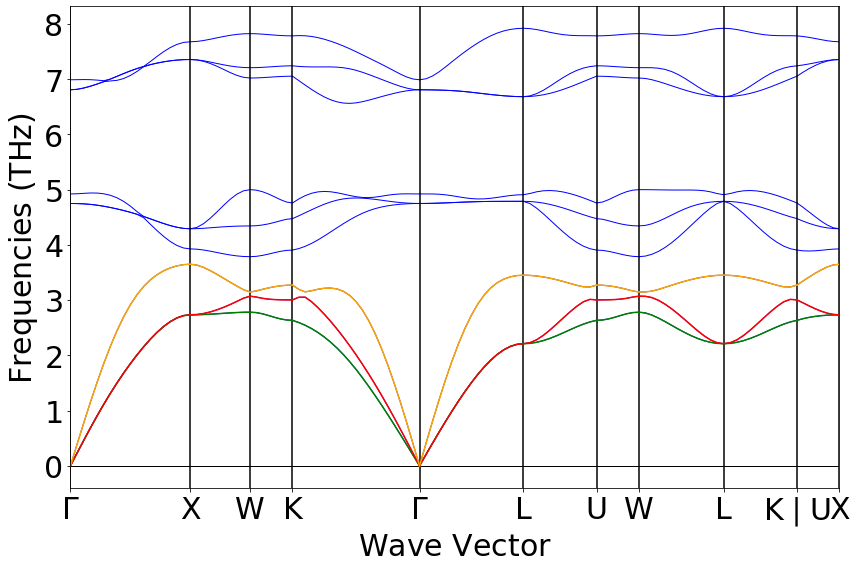

In [36]:
#Récupération des données

bsplotter = PhononBSPlotter(phononBandstructure)
data = bsplotter.bs_plot_data()

distances = data['distances']
freq = data['frequency']
#print(distances)

#Affichage des 3 branches acoustiques
PhononBSPlotter(phononBandstructure).get_plot()
for i in range(len(distances)): 
    plt.plot(distances[i],freq[i][0],'green')
    plt.plot(distances[i],freq[i][1],'red')
    plt.plot(distances[i],freq[i][2],'orange')
print("Les trois branches acoustiques sont représentées en vert, rouge et orange: ")

La vitesse du son de la première branche acoustique selon la direction Γ - X est de  2641.7582575271704  [m/s].
La vitesse du son de la deuxième branche acoustique selon la direction K - Γ est de  2644.5601756315878 [m/s].
La vitesse du son de la troisième branche acoustique selon la direction Γ - L est de  4732.211982427663 [m/s].


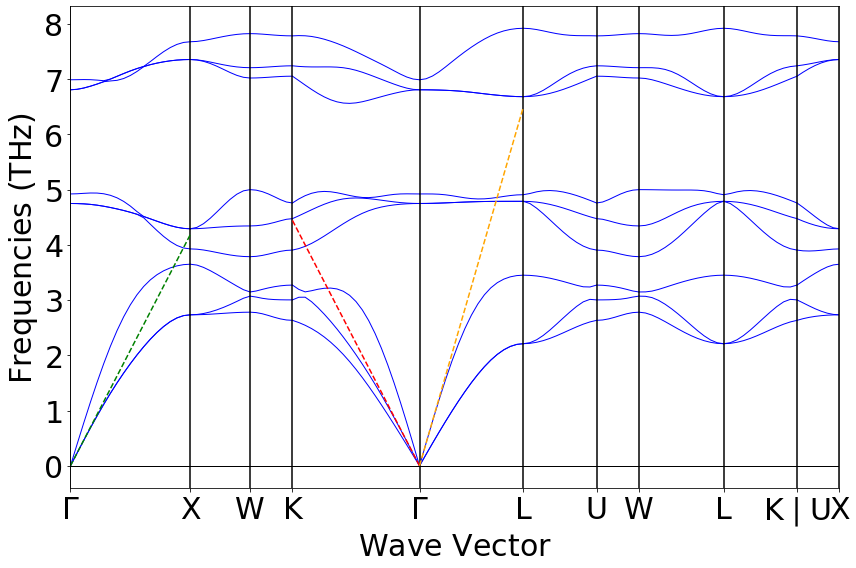

In [39]:
#Calcul de la vitesse pour ces trois branches


#Les 3 distances sont:
d1 = distances[0]
d2 = distances[3]
d3 = distances[4]

#Fréquences de ces distances
freq1 = freq[0][0]
freq2 = freq[3][1]
freq3 = freq[4][2]

#Vitesse pour la premiere branche
delta_d1 = d1[1] - d1[0]
delta_f1 = freq1[1] - freq1[0]
vitesse1 = fabs((delta_f1/delta_d1)*2*pi*100)

#Vitesse pour la deuxieme branche
delta_d2 = d2[-2] - d2[-1]
delta_f2 = freq2[-2] - freq2[-1]
vitesse2 = fabs((delta_f2/delta_d2)*2*pi*100)

#Vitesse pour la troisieme branche
delta_d3 = d3[1] - d3[0]
delta_f3 = freq3[1] - freq3[0]
vitesse3 = fabs((delta_f3/delta_d3)*2*pi*100)

print("La vitesse du son de la première branche acoustique selon la direction \u0393 - X est de ", vitesse1, " [m/s].")
print("La vitesse du son de la deuxième branche acoustique selon la direction K - \u0393 est de ", vitesse2, "[m/s].")
print("La vitesse du son de la troisième branche acoustique selon la direction \u0393 - L est de ", vitesse3, "[m/s].")



# Représentation graphique

#Vitesse1
x1 = np.array([d1[0],d1[1]])
y1 = np.array([freq1[0],freq1[1]])
pol1 = np.polyfit(x1,y1,1)
a1 = np.linspace(d1[0],d1[-1],1000)
l1 = pol1[0]*a1 + pol1[1]

#Vitesse2
x2 = np.array([d2[-1],d2[-2]])
y2 = np.array([freq2[-1],freq2[-2]])
pol2 = np.polyfit(x2,y2,1)
a2 = np.linspace(d2[0],d2[-1],1000)
l2 = pol2[0]*a2 + pol2[1]

#Vitesse 3
x3 = np.array([d3[0],d3[1]])
y3 = np.array([freq3[0],freq3[1]])
pol3 = np.polyfit(x3,y3,1)
a3 = np.linspace(d3[0],d3[-1],1000)
l3 = pol3[0]*a3 + pol3[1]

bsplotter.get_plot()
plt.plot(a1,l1,color='green',ls='--')
plt.plot(a2,l2,color='red',ls='--')
plt.plot(a3,l3,color='orange',ls='--')
plt.show()